##### author: Claudia Acquistapace
##### date: 08/03/2023
##### Goal: code to plot mean cloud profiles for each human label class and general environmental conditions


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import rcParams
from warnings import warn
import datetime as dt
from scipy import interpolate
import matplotlib as mpl
import os.path
import itertools
import os.path

path_out = '/net/ostro/ML_work_DC/human_labels_analysis/'
flower_hl = xr.open_dataset(path_out+'flowers_hl_era5.nc')
flowers_nn = xr.open_dataset(path_out+'flowers_near_era5.nc')
        
fish_hl = xr.open_dataset(path_out+'fish_hl_era5.nc')
fish_nn = xr.open_dataset(path_out+'fish_near_era5.nc')

sugar_hl = xr.open_dataset(path_out+'sugar_hl_era5.nc')
sugar_nn = xr.open_dataset(path_out+'sugar_near_era5.nc')

gravel_hl = xr.open_dataset(path_out+'gravel_hl_era5.nc')
gravel_nn = xr.open_dataset(path_out+'gravel_near_era5.nc')

In [2]:
flowers_nn

<xarray.Dataset>
Dimensions:            (n_crops: 450, levels: 37)
Coordinates:
  * n_crops            (n_crops) int64 0 1 2 3 4 5 6 ... 444 445 446 447 448 449
  * levels             (levels) int32 1000 975 950 925 900 875 ... 10 7 5 3 2 1
Data variables: (12/31)
    ERA5_availability  (n_crops) float64 ...
    im_names           (n_crops) float64 ...
    SST                (n_crops) float64 ...
    SST_std            (n_crops) float64 ...
    TCWV               (n_crops) float64 ...
    TCWV_std           (n_crops) float64 ...
    ...                 ...
    rh_std             (n_crops, levels) float64 ...
    rh                 (n_crops, levels) float64 ...
    clwc_std           (n_crops, levels) float64 ...
    clwc               (n_crops, levels) float64 ...
    cc_std             (n_crops, levels) float64 ...
    cc                 (n_crops, levels) float64 ...
Attributes: (12/19)
    CREATED_BY:        Claudia Acquistapace
    CREATED_ON:        2023-03-08 12:10:51.869680
    FILL_VALUE:        NaN
    PI_NAME:           Claudia Acquistapace
    PI_AFFILIATION:    University of Cologne (UNI), Germany
    PI_ADDRESS:        Institute for geophysics and meteorology, Pohligstrass...
    ...                ...
    COMMENT:           
    Conventions:       CF-1.8
    title:             ERA5 variables for all the of human labels
    institution:       University of Cologne (UNI), Germany
    history:           source: ERA5\nprocessing: https://github.com/ClauCloud...
    featureType:       satellite-era5

In [3]:
flowers_nn_mean = flowers_nn.mean(dim='n_crops', skipna=True)
flowers_nn_std = flowers_nn.std(dim='n_crops', skipna=True)
flowers_hl_mean = flower_hl.mean(dim='n_crops', skipna=True)
flowers_hl_std = flower_hl.std(dim='n_crops', skipna=True)

fish_nn_mean = fish_nn.mean(dim='n_crops', skipna=True)
fish_nn_std = fish_nn.std(dim='n_crops', skipna=True)
fish_hl_mean = fish_hl.mean(dim='n_crops', skipna=True)
fish_hl_std = fish_hl.std(dim='n_crops', skipna=True)


sugar_nn_mean = sugar_nn.mean(dim='n_crops', skipna=True)
sugar_nn_std = sugar_nn.std(dim='n_crops', skipna=True)
sugar_hl_mean = sugar_hl.mean(dim='n_crops', skipna=True)
sugar_hl_std = sugar_hl.std(dim='n_crops', skipna=True)


gravel_nn_mean = gravel_nn.mean(dim='n_crops', skipna=True)
gravel_nn_std = gravel_nn.std(dim='n_crops', skipna=True)
gravel_hl_mean = gravel_hl.mean(dim='n_crops', skipna=True)
gravel_hl_std = gravel_hl.std(dim='n_crops', skipna=True)



/tmp/ipykernel_566822/3232245118.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_566822/3232245118.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_566822/3232245118.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_566822/3232245118.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)


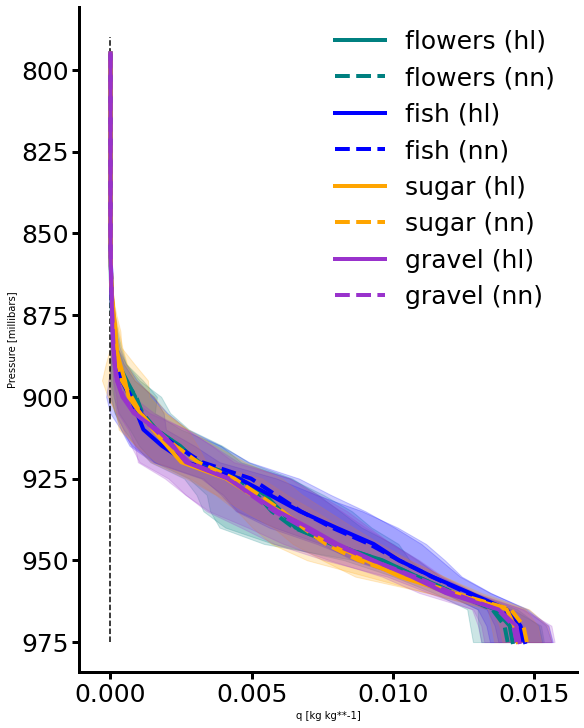

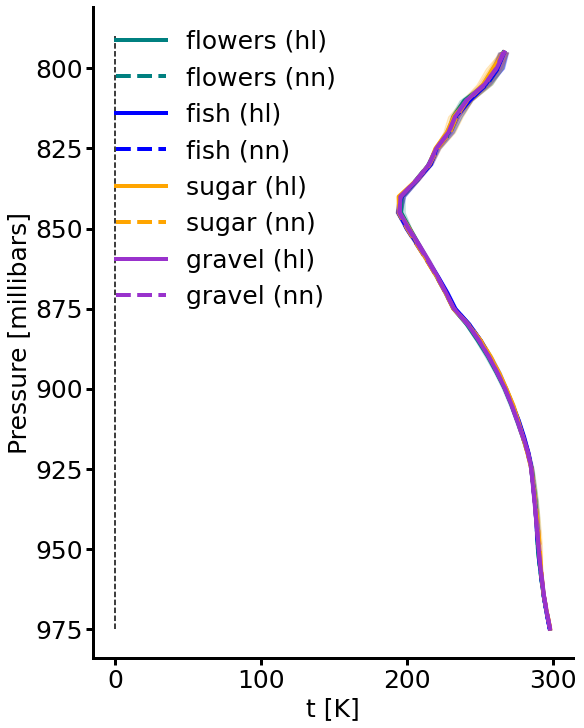

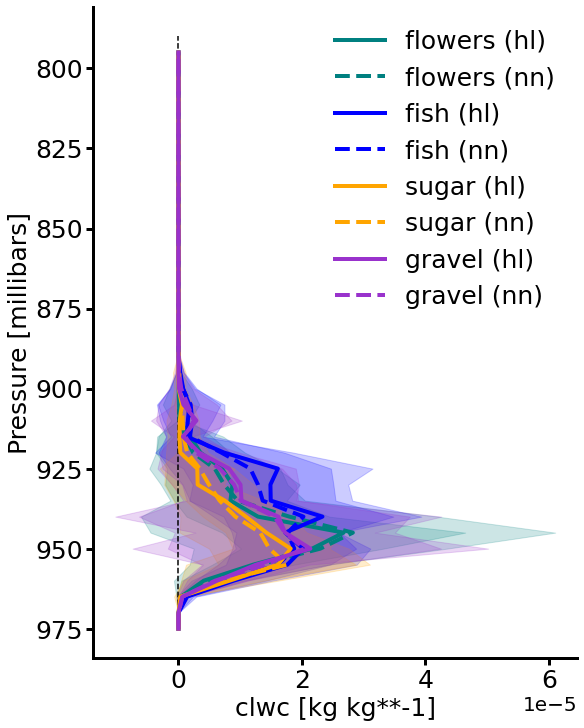

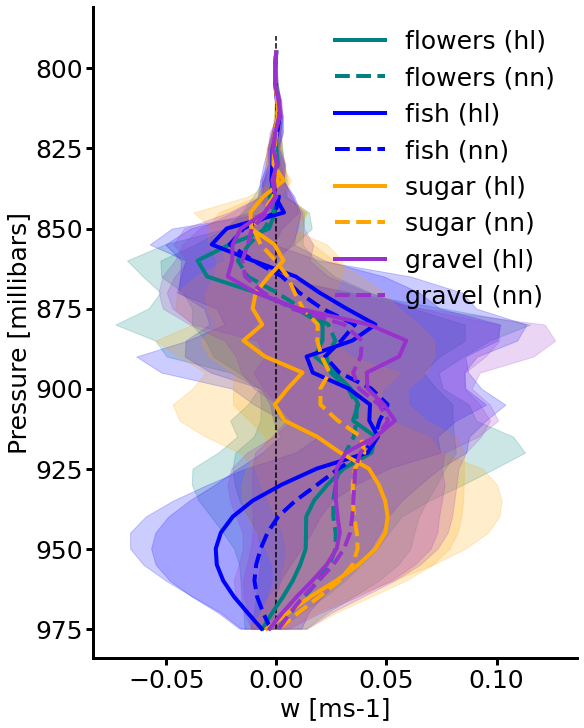

In [4]:
# to do : 
# wiskers plot for SST, TCWV, TCC, TCLW, TCRW, CBH
# profiles of q, t, w, clwc
dict_plot_settings = {
    'labelsizeaxes':25,
    'fontSizeTitle':25,
    'fontSizeX'    :25,
    'fontSizeY'    :25,
    'cbarAspect'   :25,
    'fontSizeCbar' :25,
    'rcparams_font':['Tahoma'],
    'savefig_dpi'  :100,
    'font_size'    :25,
    'grid'         :True}    

levels = flower_hl.levels.values
vars_list = ['q', 't', 'clwc', 'w', 'u', 'v', 'rh', 'cc']


levels = flowers_hl_mean.levels.values
strlev = []
for ind, lev in enumerate(levels):
    strlev.append(str(lev))
    
    
for ind_var, var_name in enumerate(vars_list):
    mean_fl = flowers_hl_mean[vars_list[ind_var]].values
    std_fl = flowers_hl_std[vars_list[ind_var]].values
    mean_fl_nn = flowers_nn_mean[vars_list[ind_var]].values
    std_fl_nn = flowers_nn_std[vars_list[ind_var]].values

    mean_fi = fish_hl_mean[vars_list[ind_var]].values
    std_fi = fish_hl_std[vars_list[ind_var]].values
    mean_fi_nn = fish_nn_mean[vars_list[ind_var]].values
    std_fi_nn = fish_nn_std[vars_list[ind_var]].values
    
    mean_su = sugar_hl_mean[vars_list[ind_var]].values
    std_su = sugar_hl_std[vars_list[ind_var]].values
    mean_su_nn = sugar_nn_mean[vars_list[ind_var]].values
    std_su_nn = sugar_nn_std[vars_list[ind_var]].values
    
    mean_gr = gravel_hl_mean[vars_list[ind_var]].values
    std_gr = gravel_hl_std[vars_list[ind_var]].values
    mean_gr_nn = gravel_nn_mean[vars_list[ind_var]].values
    std_gr_nn = gravel_nn_std[vars_list[ind_var]].values
    
    fig, axs = plt.subplots(figsize=(8,10), constrained_layout=True)
    # plots settings defined by user at the top
    labelsizeaxes   = dict_plot_settings['labelsizeaxes']
    fontSizeTitle   = dict_plot_settings['fontSizeTitle']
    fontSizeX       = dict_plot_settings['fontSizeX']
    fontSizeY       = dict_plot_settings['fontSizeY']
    cbarAspect      = dict_plot_settings['cbarAspect']
    fontSizeCbar    = dict_plot_settings['fontSizeCbar']
    matplotlib.rcParams['savefig.dpi'] = dict_plot_settings['savefig_dpi']
    plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
    grid = dict_plot_settings['grid']
    matplotlib.rc('xtick', labelsize=20)  # sets dimension of ticks in the plots
    matplotlib.rc('ytick', labelsize=20) # sets dimension of ticks in the plots    fs = 32
    #ax1.set_xlim(binned_sst[0]-1.5, binned_sst[-1]+0.1)
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.spines['bottom'].set_linewidth(3)
    axs.spines['left'].set_linewidth(3)
    #ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
    axs.tick_params(which='minor', length=5, width=2)
    axs.tick_params(which='major', length=7, width=3)
    #ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
    axs.vlines(0.,0, len(levels), linestyle='--', color='black')
    axs.tick_params(axis='both', labelsize=dict_plot_settings['labelsizeaxes'])    

    axs.plot(mean_fl, np.arange(len(levels)), linewidth=4, rasterized=True, color='teal', label='flowers (hl)')    
    axs.fill_betweenx(np.arange(len(levels)), mean_fl-std_fl, mean_fl+std_fl, color='teal', alpha=0.2)

    axs.plot(mean_fl_nn, np.arange(len(levels)), 'teal', linewidth=4, rasterized=True, label='flowers (nn)', linestyle='--')    
    axs.fill_betweenx(np.arange(len(levels)), mean_fl_nn-std_fl_nn, mean_fl_nn+std_fl_nn, color='teal', alpha=0.2)

    axs.plot(mean_fi, np.arange(len(levels)), linewidth=4, rasterized=True, color='blue', label='fish (hl)')    
    axs.fill_betweenx(np.arange(len(levels)), mean_fi-std_fi, mean_fi+std_fi, color='blue', alpha=0.2)

    axs.plot(mean_fi_nn, np.arange(len(levels)), 'blue', linewidth=4, rasterized=True, label='fish (nn)', linestyle='--')    
    axs.fill_betweenx(np.arange(len(levels)), mean_fi_nn-std_fi_nn, mean_fi_nn+std_fi_nn, color='blue', alpha=0.2)

    axs.plot(mean_su, np.arange(len(levels)), linewidth=4, rasterized=True, color='orange', label='sugar (hl)')    
    axs.fill_betweenx(np.arange(len(levels)), mean_su-std_su, mean_su+std_su, color='orange', alpha=0.2)

    axs.plot(mean_su_nn, np.arange(len(levels)), 'orange', linewidth=4, rasterized=True, label='sugar (nn)', linestyle='--')    
    axs.fill_betweenx(np.arange(len(levels)), mean_su_nn-std_su_nn, mean_su_nn+std_su_nn, color='orange', alpha=0.2)

    
    axs.plot(mean_gr, np.arange(len(levels)), linewidth=4, rasterized=True, color='darkorchid', label='gravel (hl)')    
    axs.fill_betweenx(np.arange(len(levels)), mean_gr-std_gr, mean_gr+std_gr, color='darkorchid', alpha=0.2)

    axs.plot(mean_gr_nn, np.arange(len(levels)), 'darkorchid', linewidth=4, rasterized=True, label='gravel (nn)', linestyle='--')    
    axs.fill_betweenx(np.arange(len(levels)), mean_gr_nn-std_gr_nn, mean_gr_nn+std_gr_nn, color='darkorchid', alpha=0.2)

    
    
    axs.set_ylabel('Pressure ['+flower_hl.levels.units+']')
    axs.set_xlabel(var_name+' ['+flower_hl[var_name].units+']')

    axs.set_yticklabels(strlev)
    axs.legend(frameon=False)
    #axs.set_xlim(-0.2, 0.2)
    fig.savefig(path_out+var_name+'_profiles_flowers.png')

we now merge nn and hl profiles and derive one mean profile and std


In [5]:
flowers_all = xr.concat([flower_hl, flowers_nn], dim='n_crops')
sugar_all = xr.concat([sugar_hl, sugar_nn], dim='n_crops')
fish_all = xr.concat([fish_hl, fish_nn], dim='n_crops')
gravel_all = xr.concat([gravel_hl, gravel_nn], dim='n_crops')


flowers_mean = flowers_all.mean(dim='n_crops', skipna=True)
flowers_std = flowers_all.std(dim='n_crops', skipna=True)

fish_mean = fish_all.mean(dim='n_crops', skipna=True)
fish_std = fish_all.std(dim='n_crops', skipna=True)

sugar_mean = sugar_all.mean(dim='n_crops', skipna=True)
sugar_std = sugar_all.std(dim='n_crops', skipna=True)

gravel_mean = gravel_all.mean(dim='n_crops', skipna=True)
gravel_std = gravel_all.std(dim='n_crops', skipna=True)


/tmp/ipykernel_566822/2350815869.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_566822/2350815869.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_566822/2350815869.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_566822/2350815869.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_566822/2350815869.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_566822/2350815869.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(strlev)
/tmp/ipykernel_566822/2350815869.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_ytick

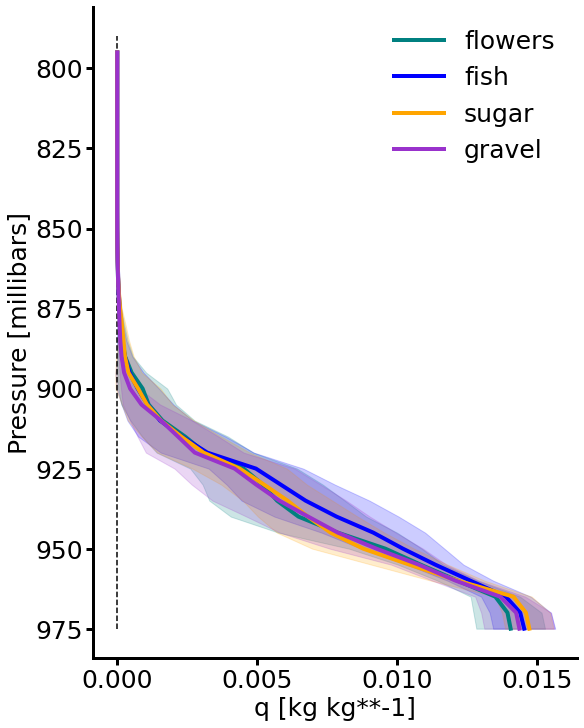

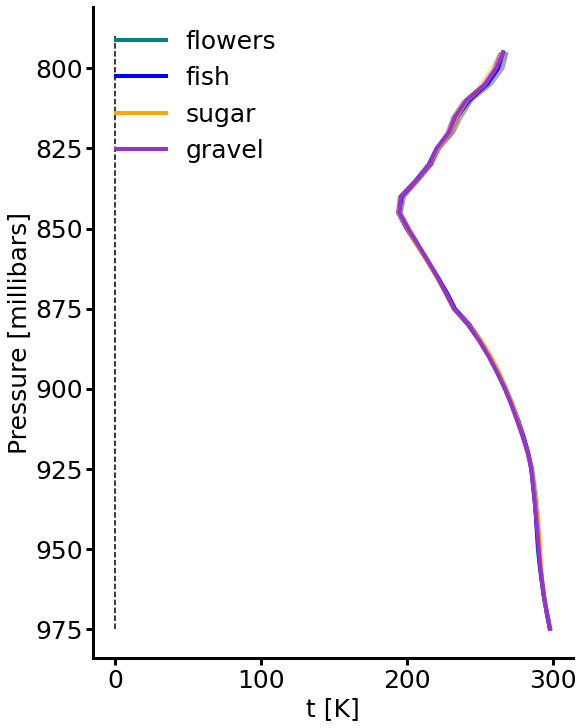

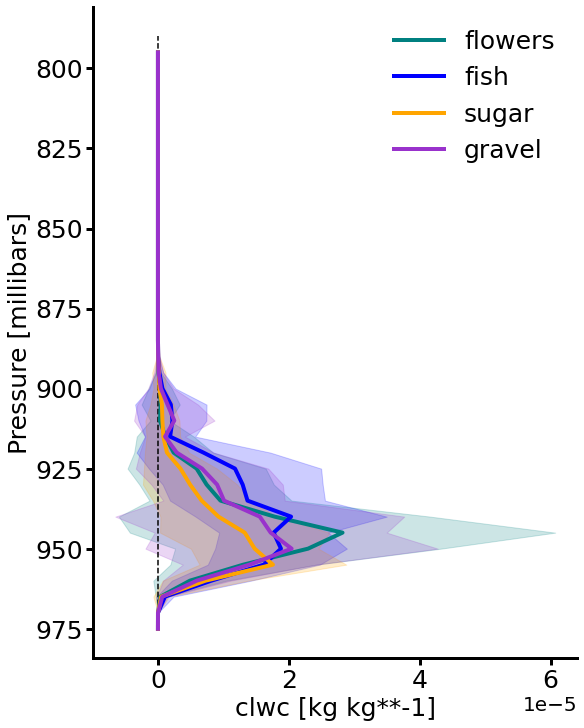

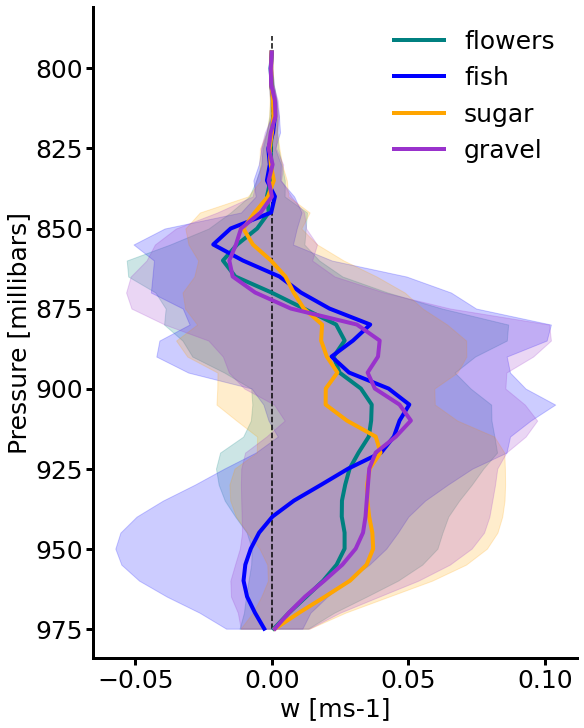

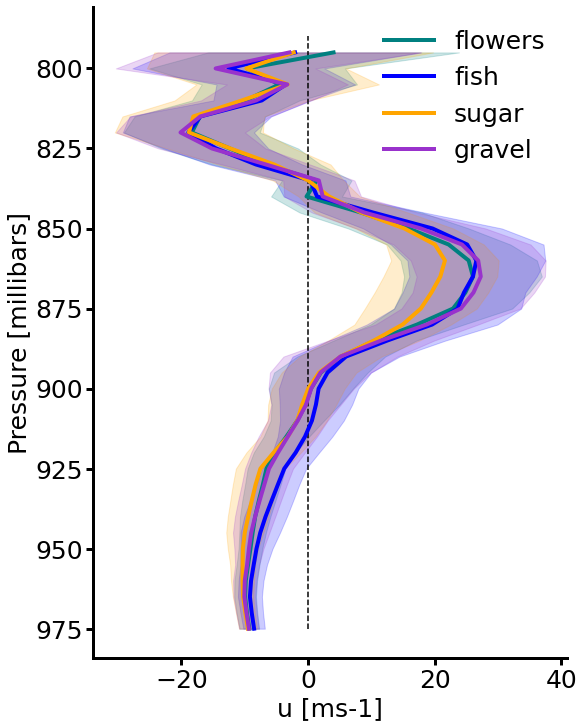

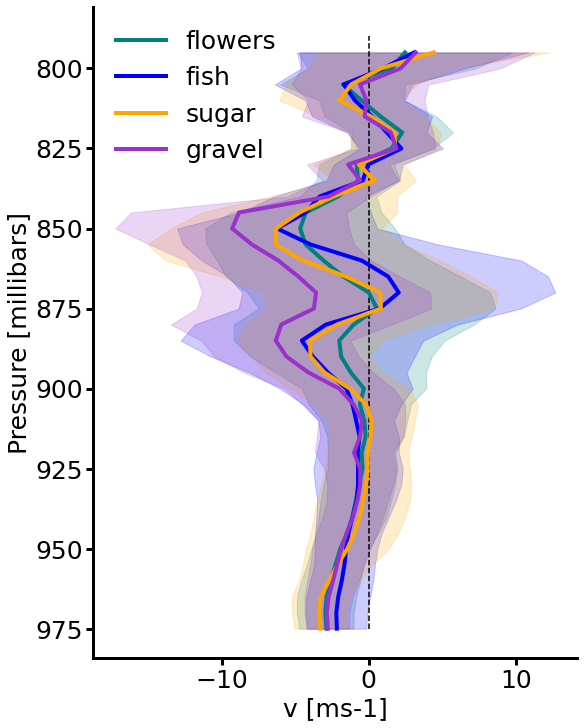

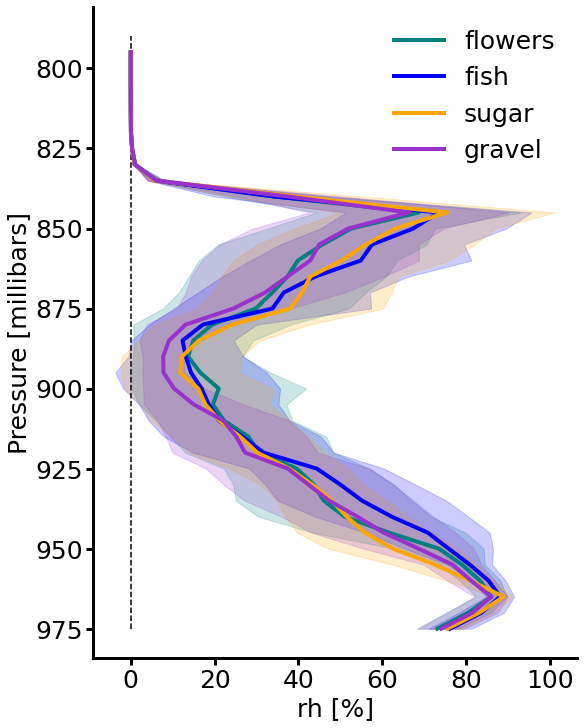

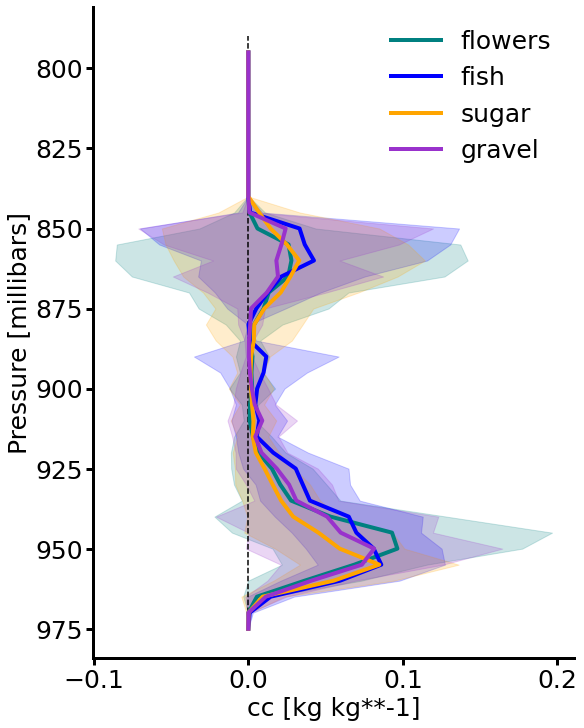

In [8]:

vars_list = ['q', 't', 'clwc', 'w', 'u', 'v', 'rh', 'cc']

for ind_var, var_name in enumerate(vars_list):
    mean_fl = flowers_mean[vars_list[ind_var]].values
    std_fl = flowers_std[vars_list[ind_var]].values

    mean_fi = fish_mean[vars_list[ind_var]].values
    std_fi = fish_std[vars_list[ind_var]].values
    
    mean_su = sugar_mean[vars_list[ind_var]].values
    std_su = sugar_std[vars_list[ind_var]].values
    
    mean_gr = gravel_mean[vars_list[ind_var]].values
    std_gr = gravel_std[vars_list[ind_var]].values
    
    fig, axs = plt.subplots(figsize=(8,10), constrained_layout=True)
    # plots settings defined by user at the top
    labelsizeaxes   = dict_plot_settings['labelsizeaxes']
    fontSizeTitle   = dict_plot_settings['fontSizeTitle']
    fontSizeX       = dict_plot_settings['fontSizeX']
    fontSizeY       = dict_plot_settings['fontSizeY']
    cbarAspect      = dict_plot_settings['cbarAspect']
    fontSizeCbar    = dict_plot_settings['fontSizeCbar']
    matplotlib.rcParams['savefig.dpi'] = dict_plot_settings['savefig_dpi']
    plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
    grid = dict_plot_settings['grid']
    matplotlib.rc('xtick', labelsize=20)  # sets dimension of ticks in the plots
    matplotlib.rc('ytick', labelsize=20) # sets dimension of ticks in the plots    fs = 32
    #ax1.set_xlim(binned_sst[0]-1.5, binned_sst[-1]+0.1)
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.spines['bottom'].set_linewidth(3)
    axs.spines['left'].set_linewidth(3)
    #ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
    axs.tick_params(which='minor', length=5, width=2)
    axs.tick_params(which='major', length=7, width=3)
    #ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5)) 
    axs.vlines(0.,0, len(levels), linestyle='--', color='black')
    axs.tick_params(axis='both', labelsize=dict_plot_settings['labelsizeaxes'])    

    axs.plot(mean_fl, np.arange(len(levels)), linewidth=4, rasterized=True, color='teal', label='flowers')    
    axs.fill_betweenx(np.arange(len(levels)), mean_fl-std_fl, mean_fl+std_fl, color='teal', alpha=0.2)

    axs.plot(mean_fi, np.arange(len(levels)), linewidth=4, rasterized=True, color='blue', label='fish')    
    axs.fill_betweenx(np.arange(len(levels)), mean_fi-std_fi, mean_fi+std_fi, color='blue', alpha=0.2)

    axs.plot(mean_su, np.arange(len(levels)), linewidth=4, rasterized=True, color='orange', label='sugar')    
    axs.fill_betweenx(np.arange(len(levels)), mean_su-std_su, mean_su+std_su, color='orange', alpha=0.2)

    axs.plot(mean_gr, np.arange(len(levels)), linewidth=4, rasterized=True, color='darkorchid', label='gravel')    
    axs.fill_betweenx(np.arange(len(levels)), mean_gr-std_gr, mean_gr+std_gr, color='darkorchid', alpha=0.2)
    
    axs.set_ylabel('Pressure ['+flower_hl.levels.units+']')
    axs.set_xlabel(var_name+' ['+flower_hl[var_name].units+']')

    axs.set_yticklabels(strlev)
    axs.legend(frameon=False)
    #axs.set_xlim(-0.2, 0.2)
    fig.savefig(path_out+var_name+'_profiles_merged_nn_hl.png')

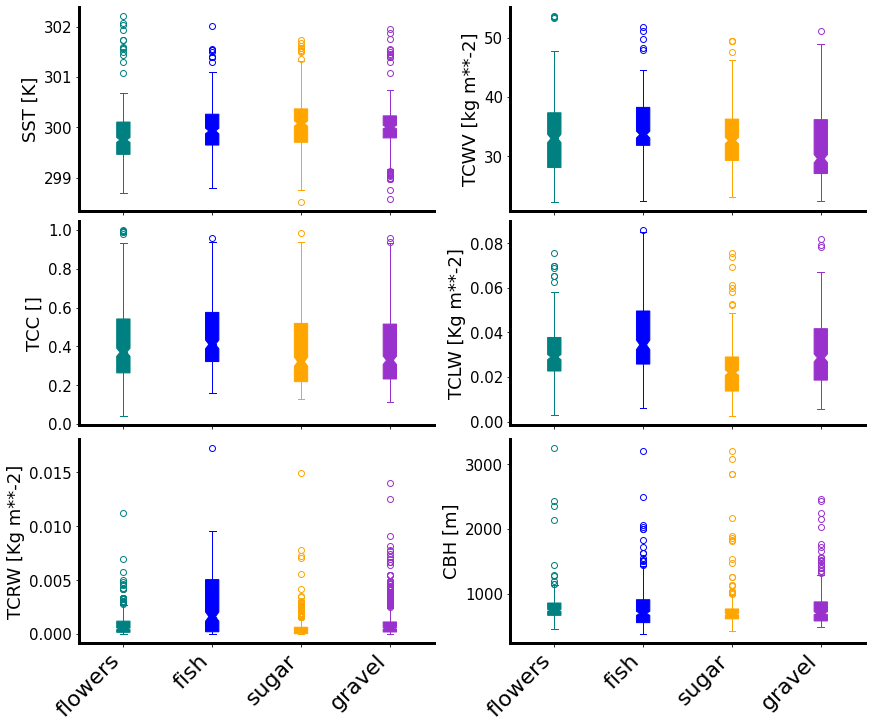

In [40]:
# wiskers plot 
var_names = [ 'SST', 'TCWV', 'TCC', 'TCLW', 'TCRW', 'CBH']

fig, axes = plt.subplots(3, 2, sharex = True, figsize =(12, 10), constrained_layout = True)
#axes[1,0].set_xlabel('Classes', fontsize = 22)
#axes[1,0].set_ylabel('Cloud percent', fontsize = 22)
#axes[1,0].set_xticklabels(['1','2','3','4','5','6','7'], fontsize = 16)
labelsizeaxes   = dict_plot_settings['labelsizeaxes']
fontSizeTitle   = dict_plot_settings['fontSizeTitle']
fontSizeX       = dict_plot_settings['fontSizeX']
fontSizeY       = dict_plot_settings['fontSizeY']
cbarAspect      = dict_plot_settings['cbarAspect']
fontSizeCbar    = dict_plot_settings['fontSizeCbar']
matplotlib.rcParams['savefig.dpi'] = dict_plot_settings['savefig_dpi']
plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
grid = dict_plot_settings['grid']
matplotlib.rc('xtick', labelsize=20)  # sets dimension of ticks in the plots
matplotlib.rc('ytick', labelsize=20) # sets dimension of ticks in the plots    fs = 32
#ax1.set_xlim(binned_sst[0]-1.5, binned_sst[-1]+0.1)

color = ['teal', 'blue', 'orange', 'darkorchid']
xlabel = ['flowers', 'fish', 'sugar', 'gravel']
pos = [0.5, 1.5, 2.5, 3.5]
data_arr = [flowers_all, fish_all, sugar_all, gravel_all]
for i, ax in enumerate(fig.axes): # axis subplot
    var_name = var_names[i]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    for keys, cat in enumerate(xlabel):    # different dataframes
        df = data_arr[keys]
        c = color[keys]
        parameter = df[var_name].values  # collect values from fifferent df
        parameter = parameter[~np.isnan(parameter)]
        bplot = ax.boxplot(parameter, positions=[pos[keys]], notch=True,  # notch shape
                     patch_artist=True, 
                     boxprops=dict(facecolor=c, color=c),
                     capprops=dict(color=c),
                     whiskerprops=dict(color=c),
                     flierprops=dict(color=c, markeredgecolor=c),
                     medianprops=dict(color=c))

        #for patch, color in zip(bplot['boxes'], color):
        #    patch.set_facecolor(color[0])
        ax.set_xticks((0.5, 1.5, 2.5, 3.5))
        ax.set_xticklabels(xlabel, fontsize = 22, rotation = 45,ha="right")
        ax.set_ylabel(var_name+' ['+df[var_name].units+']', fontsize = 18)
        ax.tick_params(axis='y', which='major', labelsize=15)


#fig.set_size_inches(10.5, 10.5)
fig.savefig(path_out+'wiskers_merged_nn_hl.png')